In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/image/image/test"))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import random
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,Dropout,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# Any results you write to the current directory are saved as output.

['nonlame', 'lame']


Using TensorFlow backend.


In [2]:
total_images_train_normal = os.listdir('../input/image/image/train/lame/')
total_images_train_pneumonia = os.listdir('../input/image/image/train/nonlame/')

TypeError: Image data cannot be converted to float

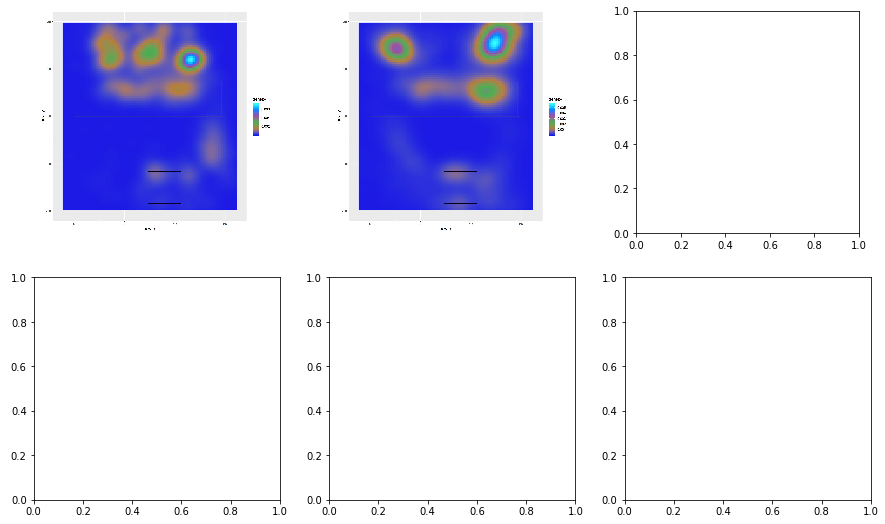

In [3]:
sample_normal = random.sample(total_images_train_normal,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread('../input/image/image/train/lame/'+sample_normal[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle(' lame cows heatmap')
plt.show()

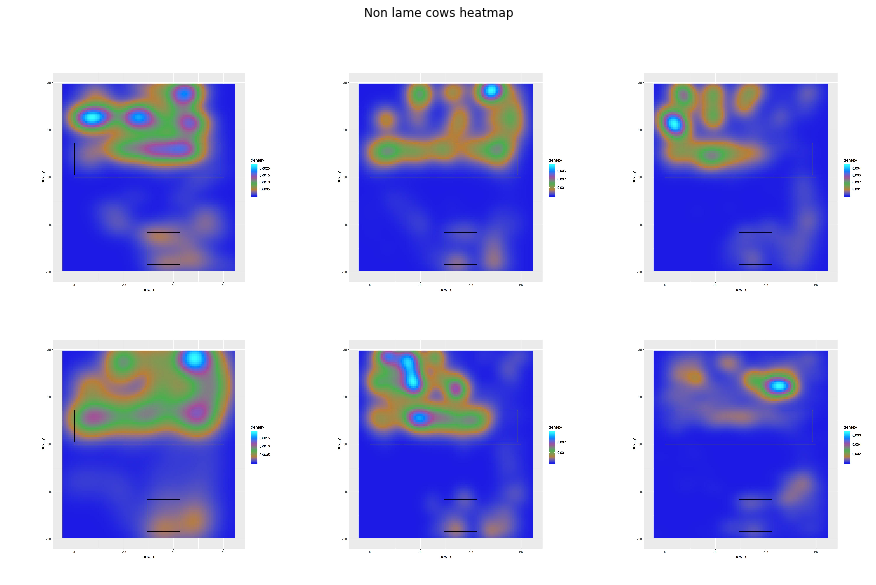

In [4]:
sample_pneumonia = random.sample(total_images_train_pneumonia,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread('../input/image/image/train/nonlame/'+sample_pneumonia[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('Non lame cows heatmap')
plt.show()

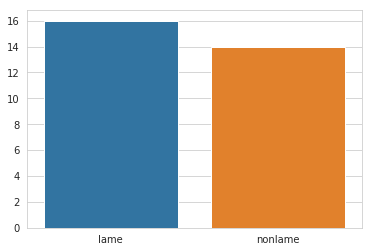

In [5]:
sns.set_style('whitegrid')
sns.barplot(x=['lame','nonlame'],y=[len(total_images_train_normal),len(total_images_train_pneumonia)])

In [6]:
image_height = 150
image_width = 150
batch_size = 10
no_of_epochs  = 50

In [7]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(image_height,image_width,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 69, 69, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 34, 34, 64)        0         
__________

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=15,
                                   shear_range=0.2,
                                   zoom_range=0.2
                                   )

test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
training_set = train_datagen.flow_from_directory('../input/image/image/train/',
                                                 target_size=(image_width, image_height),
                                                 batch_size=batch_size,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory('../input/image/image/test/',
                                            target_size=(image_width, image_height),
                                            batch_size=batch_size,
                                            class_mode='binary')


Found 28 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [11]:
reduce_learning_rate = ReduceLROnPlateau(monitor='loss',
                                         factor=0.1,
                                         patience=2,
                                         cooldown=2,
                                         min_lr=0.00001,
                                         verbose=1)

callbacks = [reduce_learning_rate]

In [12]:
history = model.fit_generator(training_set,
                    steps_per_epoch= batch_size,
                    epochs=no_of_epochs,
                    validation_data=test_set,
                    validation_steps=batch_size,
                    callbacks=callbacks
                   )

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
10/10 [==============================] - 20s 2s/step - loss: 1.0033 - acc: 0.4562 - val_loss: 0.6958 - val_acc: 0.4000
Epoch 2/50
10/10 [==============================] - 17s 2s/step - loss: 0.6954 - acc: 0.4283 - val_loss: 0.6926 - val_acc: 0.6000
Epoch 3/50
10/10 [==============================] - 17s 2s/step - loss: 0.6934 - acc: 0.4899 - val_loss: 0.6921 - val_acc: 0.6000
Epoch 4/50
10/10 [==============================] - 17s 2s/step - loss: 0.6932 - acc: 0.4854 - val_loss: 0.6922 - val_acc: 0.6000
Epoch 5/50
10/10 [==============================] - 16s 2s/step - loss: 0.6910 - acc: 0.6038 - val_loss: 0.6901 - val_acc: 0.4000
Epoch 6/50
10/10 [==============================] - 16s 2s/step - loss: 0.6421 - acc: 0.7051 - val_loss: 0.5931 - val_acc: 0.7000
Epoch 7/50
10/10 [==============================] - 17s 2s/step - loss: 0.4724 - acc: 0.8245 - val_loss: 0.4403 - val_acc: 0.7000
Epoch 8/50
10/10 [========================

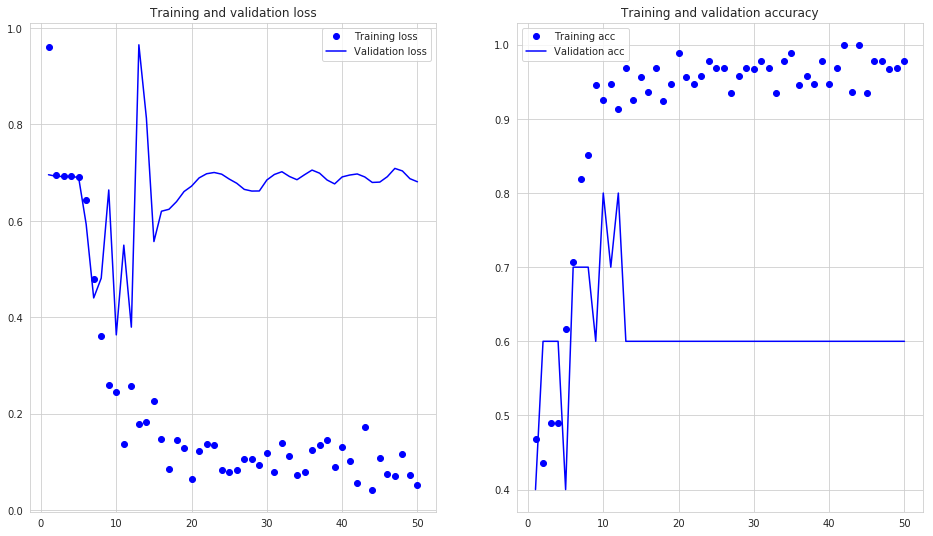

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(16,9))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()